Files needed to run cells:



*   alpha_consensus.fasta
*   delta_consensus.fasta
*   omni1_consensus.fasta
*   omni2_consensus.fasta
*   wuhan.fa
*   humanCodonTable.csv



# Codon Counting Code

In [1]:
''''
WILL NEED TO UPDATE START AND STOP POSITION FOR WHICHEVER ORF OR SEQUENCE WE NEED

RUN THIS CELL !!!!
'''


# Amino Acids Table (codons are LOWER CASE)
amino_acids = {'ttt': 'F', 'tct': 'S', 'tat': 'Y', 'tgt': 'C',
'ttc': 'F', 'tcc': 'S', 'tac': 'Y', 'tgc': 'C',
'tta': 'L', 'tca': 'S', 'taa': '*', 'tga': '*',
'ttg': 'L', 'tcg': 'S', 'tag': '*', 'tgg': 'W',
'ctt': 'L', 'cct': 'P', 'cat': 'H', 'cgt': 'R',
'ctc': 'L', 'ccc': 'P', 'cac': 'H', 'cgc': 'R',
'cta': 'L', 'cca': 'P', 'caa': 'Q', 'cga': 'R',
'ctg': 'L', 'ccg': 'P', 'cag': 'Q', 'cgg': 'R',
'att': 'I', 'act': 'T', 'aat': 'N', 'agt': 'S',
'atc': 'I', 'acc': 'T', 'aac': 'N', 'agc': 'S',
'ata': 'I', 'aca': 'T', 'aaa': 'K', 'aga': 'R',
'atg': 'M', 'acg': 'T', 'aag': 'K', 'agg': 'R',
'gtt': 'V', 'gct': 'A', 'gat': 'D', 'ggt': 'G',
'gtc': 'V', 'gcc': 'A', 'gac': 'D', 'ggc': 'G',
'gta': 'V', 'gca': 'A', 'gaa': 'E', 'gga': 'G',
'gtg': 'V', 'gcg': 'A', 'gag': 'E', 'ggg': 'G'
}


'''
Read in consensus sequence file.
UPDATE FILE NAME!!!
'''
# with open("alpha_consensus.fasta", "r") as infile:
#     alpha_cons = infile.readline()
#     # REMEBER to remove GAPS
#     alpha_cons = alpha_cons.replace("-", "").lower()


# with open("delta_consensus.fasta", "r") as infile:
#      delta_cons = infile.readline()
#      # REMEBER to remove GAPS
#      delta_cons = delta_cons.replace("-", "").lower()

# with open("omni_consensus.fasta", "r") as infile:
#     omni_cons = infile.readline()
#     # REMEBER to remove GAPS
#     omni_cons = omni_cons.replace("-", "").lower()

'''
Function to count codons
'''
def codon_count(consensus, start, stop):
    start = start-1
    # Codon counter dict
    codon_counter = {}
    # Amino acid seq
    my_amino_acid = ''
    # Traverse orf
    for i in range(start, stop, 3):
        current_codon = consensus[i: i + 3]
        if current_codon not in amino_acids:
            print('Problem codon detected:', current_codon)
            quit()
        try:
            codon_counter[current_codon] += 1
        except KeyError:
            codon_counter[current_codon] = 1
    #     print(current_codon, amino_acids[current_codon])
        my_amino_acid += amino_acids[current_codon]
    '''
    Quick Note: Might not even need the my_amino_acid, but leaving it in just in case.
    Will possibly remove as we get closer to verify our results.
    '''
    return codon_counter, my_amino_acid

# Open Reading Frames Positions

In [2]:
'''
RUN THIS CELL !!!
Wuhan
'''

wuhan_positions = {"orf1a": [266, 13468],
            "orf1b": [13468, 21555],
            "orf3a": [25393, 26220],
            "S": [21563, 25384],
            "E": [26245, 26472],
            "M": [26523, 27191],
            "orf6": [27202, 27387],
            "orf7a": [27394, 27759],
            "orf7b": [27756, 27887],
            "orf8": [27894, 28259],
            "N": [28274, 29533],
            "orf9b": [28284, 28577]}

# For alpha, I had some positions numbers wrong which gave
# me incorrect amino acid sequences.
# Re-did blastn and fixed issue.
alpha_positions = {"orf1a": [229, 13422],
            "orf1b": [13422, 21509],
            "orf3a": [25338, 26165],
            "S": [21517, 25329],
            "E": [26190, 26417],
            "M": [26468, 27136],
            "orf6": [27147, 27332],
            "orf7a": [27339, 27704],
            "orf7b": [27701, 27832],
            "orf8": [27839, 28204],
            "N": [28218, 29477],
            "orf9b": [28228, 28521]}

delta_positions = {"orf1a": [234, 13436],
            "orf1b": [13436, 21523],
            "orf3a": [25355, 26182],
            "S": [21531, 25346],
            "E": [26207, 26434],
            "M": [26485, 27153],
            "orf6": [27164 , 27349],
            "orf7a": [27356, 27721],
            "orf7b": [27718, 27849],
            "orf8": [27856, 28209],
            "N": [28229, 29488],
            "orf9b": [28239, 28532]}


# UPDATE TO EALRY OMIC
omic1_positions = {"orf1a": [225, 13415],
                  "orf1b": [13415, 21502],
                  "orf3a": [25322, 26149],
                  "S": [21510, 25313],
                  "E": [26174, 26401],
                  "M": [26452, 27120],
                  "orf6": [27131, 27316],
                  "orf7a": [27323, 27688],
                  "orf7b": [27685, 27816],
                  "orf8": [27823, 28188],
                  "N": [28203, 29453],
                  "orf9b": [28213, 28497]
                   }

# LATER OMIC
omic2_positions = {"orf1a": [215, 13408],
                  "orf1b": [13408, 21495],
                  "orf3a": [25324, 26151],
                  "S": [21503, 25315],
                  "E": [26176, 26403],
                  "M": [26454, 27122],
                  "orf6": [27133, 27312],
                  "orf7a": [27325, 27690],
                  "orf7b": [27687, 27818],
                  "orf8": [27825, 28190],
                  "N": [28205, 29455],
                  "orf9b": [28215, 28499]
                  }



# with open("omni2_consensus.fasta", "r") as infile:
#     omic_cons = infile.readline()
#     # REMEBER to remove GAPS
#     omic_cons = omic_cons.replace("-", "").lower()

# for values in omic2_positions.values():
#   # print(values)
#   start = values[0]-1
#   stop = values[1]
#   seq = omic_cons[start:stop]
#   print(seq, "\n")

# with open("delta_consensus.fasta", "r") as infile:
#     delta_cons = infile.readline()
#     # REMEBER to remove GAPS
#     delta_cons = delta_cons.replace("-", "").lower()

# for values in delta_positions.values():
#   # print(values)
#   start = values[0]-1
#   stop = values[1]
#   seq = delta_cons[start:stop]
#   print(seq, "\n")




# Getting Overall Codon Count




In [3]:
'''
RUN THIS CELL !!!
'''

import numpy as np
import pandas as pd

# %pip install dataframe_image
# !apt install firefox firefox-geckodriver
# !pip install dataframe_image selenium
# import dataframe_image as dfi


# '''
# Read in consensus sequence file.
# UPDATE FILE NAME!!!
# '''
# with open("alpha_consensus.fasta", "r") as infile:
#     alpha_cons = infile.readline()
#     # REMEBER to remove GAPS
#     alpha_cons = alpha_cons.replace("-", "").lower()


# with open("delta_consensus.fasta", "r") as infile:
#      delta_cons = infile.readline()
#      # REMEBER to remove GAPS
#      delta_cons = delta_cons.replace("-", "").lower()

# with open("omni_consensus.fasta", "r") as infile:
#     omni_cons = infile.readline()
#     # REMEBER to remove GAPS
#     omni_cons = omni_cons.replace("-", "").lower()



'''
Pass in variant consensus sequence, and the start and end positions of orfs
'''
def codon_dict(consensus, variant_positions):
    # Dict to hold codons and # of time it appears in the orf
    variant_codons_aa = []
    # For loop to traverse alpha positions dict
    # which holds the start and end positions
    # for each orf
    for value in variant_positions.values():
        # Get start index value
        start = value[0]
        # Get stop index value
        stop = value[1]
        # Use codon count to get the codon count dict and amino
        # acid seq for each orf.
        # Append that tuple into a list to contain all
        # codons and amino acids for each orf
        tup_codon_aa = codon_count(consensus, start, stop)
        variant_codons_aa.append(tup_codon_aa)

    # Final dict that will hold the overall codon count
    # of orfs values combined
    final_variant_codon_dict = {}

    # For loop to tranverse the list that holds the codon count and amino acid
    # sequence for each orf
    for i in range(len(variant_codons_aa)):
        temp_dict = variant_codons_aa[i][0]
        for item in temp_dict.items():
        # print(item, "\n")
            # Each item in dict is returned as a tuple
        # print(item)
            # Key for final_alpha_dict is the
            # first value from item tuple (i.e. codon)
            key = item[0]
            # Value for key in final_alpha_dict is
            # the second value from item tuple (i.e. # of times
            # codon appears)
            val = item[1]
            # Try and Except to either continueing adding
            # to an existing codon or to add in a new codon key
            # if not already there
            try:
                final_variant_codon_dict[key] += val
            except KeyError:
                final_variant_codon_dict[key] = val
    '''
    Overall codon count
    '''
    return final_variant_codon_dict

# print("Codon_Dict method:\n", codon_dict(alpha_cons, alpha_positions))

'''
Pass in variant_codon_dict (the overall codon count for a genome/orfs)
to calculate the overall occurrence of an amino acid.
This will be the denominator for when calcuating
the fraction of a codon throughout the sequence.
'''
def amino_acids_dict(variant_codon_dict):
    # Dict that will hold essentially denominator value for codon
    variant_amino_acids = {}
    # Travers the codon count dict
    for item in variant_codon_dict.items():
        # Codon string
        codon = item[0]
        # Codon count (occurrence)
        count = item[1]
        # Amino acid that codon codes for
        aa = amino_acids[codon]
        # If amino acid already exists in dict, just add the count value
        # to current count value
        try:
            variant_amino_acids[aa] += count
        # Else add in the new occurrence of amino acid and set initial count
        # to be what the current count is
        except:
            variant_amino_acids[aa] = count
    '''
    Return dict that holds the total occurrence of an amino acid throughout the genome
    '''
    return variant_amino_acids


# print("Amino Acids Dict:\n",amino_acids_dict(codon_dict(alpha_cons, alpha_positions)))


'''
Pass in the final codon count dict (numerator), and the
variant amino acids dict (denominator) .
'''
def fractions(final_variant_dict, variant_amino_acids):
    # Dict to hold the codon as key and fraction as value
    fractions = {}
    # amino_acids_list = []
    # For loop to traverse codon count for the variant (numerator value
    # for specific codon.)
    for item in final_variant_dict.items():
        # Codon string
        codon = item[0]
        # Codon count (numerator)
        numerator = item[1]
        temp_aa = amino_acids[codon]
        # For loop to traverse the amino acids count to
        # grab the denominator value
        for item1 in variant_amino_acids.items():
            # Get amino acid string
            aa = item1[0]
            # Get denom value that comes with amino acid
            denom = item1[1]
            # If the amino acid from the codon is the same as the amino
            # acid from the denominator values, then
            # calculate fraction for that codon.
            if temp_aa == aa:
                fractions[codon] = round((numerator/denom),2)
                # amino_acids_list.append(temp_aa)
    return fractions

# print("\nFractions",fractions(codon_dict(alpha_cons, alpha_positions), amino_acids_dict(codon_dict(alpha_cons, alpha_positions))))

'''
This is to merge two data frames
Essentially the human and variant dataframes to one
to help get the differnces
'''
def dataFrame(final_variant_codons, final_variant_fractions, variant_name):
    amino_acids_list = []
    variant_codons = np.array(list(final_variant_fractions.keys()))
    variant_fracs = np.array(list(final_variant_fractions.values()))
    col_name = variant_name + " Fraction"
    df = pd.DataFrame(variant_fracs.T, columns=[col_name], index = np.char.upper(variant_codons))
    return df

# alpha_df = dataFrame(codon_dict(alpha_cons, alpha_positions), fractions(codon_dict(alpha_cons, alpha_positions), amino_acids_dict(codon_dict(alpha_cons, alpha_positions))), "Alpha")


def merge_dfs(human, variant_df):
    # The .join() joins the two dataframes and places values that have the same
    # index value in the same row.
    # If the dfs have a index value that the other one does not have,
    # it just adds NAN for row.
    final_Table = human.join(variant_df)
    return final_Table


# # This is what I have so far. Does it work? Yes!
# # Does it look pretty? Hahahahaha...nope

# # Ignore
# # dfi.export(finalTable, "Alpha_Table.png")




In [4]:
'''
RUN THIS CELL !!!
'''

with open("wuhan.fa", "r") as infile:
    next(infile)
    wuhan_lines = infile.readlines()
    wuhan_seq = ""
    for line in wuhan_lines:
        x = line.strip().lower()
        wuhan_seq += x

# print(wuhan_seq)
# for values in wuhan_positions.values():
#   # print(values)
#   start = values[0]-1
#   stop = values[1]
#   seq = wuhan_seq[start:stop]
#   print(seq, "\n")



wuhan_codon_dict = codon_dict(wuhan_seq, wuhan_positions)
print("Wuhan Codon Dict (Numerator):\n", wuhan_codon_dict, "\n")
wuhan_amino_acids_dict = amino_acids_dict(wuhan_codon_dict)
print("Wuhan Amino Acids (Denom):\n", wuhan_amino_acids_dict,'\n')
wuhan_frac = fractions(wuhan_codon_dict, wuhan_amino_acids_dict)
print("Wuhan Codon Fractions:\n", wuhan_frac, "\n")
wuhan_df = dataFrame(wuhan_codon_dict, wuhan_frac, "Wuhan")
print("Wuhan DataFrame:\n")
display(wuhan_df)

print("FinalTable Df:\n")
human = pd.read_csv("humanCodonTable.csv", index_col = 0)
human = human.sort_values(by=["Amino Acid"])

finalTable0 = merge_dfs(human, wuhan_df).dropna()
finalTable0["Frac Diffs"] = (finalTable0.loc[:, "Fraction"] - finalTable0.loc[:, "Wuhan Fraction"]).abs()
finalTable0 = finalTable0.drop(index=["TGA", "TAA"])
display(finalTable0)
avg = np.mean(finalTable0.loc[:, "Frac Diffs"])
print("Avg Differnce b/t Human and Wuhan Codons:\n",avg)

# dfi.export(finalTable0.head(), "Wuhan1_Table.png")

Wuhan Codon Dict (Numerator):
 {'atg': 210, 'gag': 126, 'agc': 41, 'ctt': 272, 'gtc': 112, 'cct': 192, 'ggt': 338, 'ttc': 150, 'aac': 174, 'aaa': 370, 'aca': 294, 'cac': 59, 'caa': 256, 'ctc': 93, 'agt': 157, 'ttg': 166, 'gtt': 381, 'tta': 256, 'cag': 113, 'cgc': 35, 'gac': 188, 'gtg': 117, 'gta': 177, 'cgt': 86, 'ggc': 103, 'ttt': 348, 'gga': 119, 'tcc': 52, 'tca': 186, 'gca': 184, 'cat': 131, 'gat': 327, 'act': 321, 'tgt': 229, 'gaa': 322, 'ccc': 32, 'tat': 272, 'atc': 96, 'tcg': 12, 'gct': 358, 'cga': 17, 'ctg': 49, 'att': 262, 'tac': 174, 'ata': 157, 'cca': 160, 'aag': 198, 'aat': 358, 'gcc': 95, 'cta': 102, 'tgg': 111, 'acc': 72, 'ggg': 18, 'tgc': 66, 'agg': 48, 'acg': 36, 'tct': 215, 'aga': 156, 'gcg': 26, 'ccg': 17, 'cgg': 11, 'taa': 9, 'tga': 2} 

Wuhan Amino Acids (Denom):
 {'M': 210, 'E': 448, 'S': 663, 'L': 938, 'V': 787, 'P': 401, 'G': 578, 'F': 498, 'N': 532, 'K': 568, 'T': 723, 'H': 190, 'Q': 369, 'R': 353, 'D': 515, 'A': 663, 'C': 295, 'Y': 446, 'I': 515, 'W': 111, '*': 

,Wuhan Fraction
ATG,1.00
GAG,0.28
AGC,0.06
CTT,0.29
GTC,0.14
...,...
GCG,0.04
CCG,0.04
CGG,0.03
TAA,0.82


FinalTable Df:



,Amino Acid,Fraction,Frequency/Thousand,Number,Wuhan Fraction,Frac Diffs
Triplet,,,,,,
GCG,A,0.11,7.6,150708,0.04,0.07
GCA,A,0.23,16.0,317338,0.28,0.05
GCC,A,0.40,28.5,567930,0.14,0.26
GCT,A,0.26,18.6,370873,0.54,0.28
TGC,C,0.55,12.2,243685,0.22,0.33
...,...,...,...,...,...,...
GTC,V,0.24,14.6,290874,0.14,0.10
GTT,V,0.18,10.9,216818,0.48,0.30
TGG,W,1.00,12.8,255512,1.00,0.00


Avg Differnce b/t Human and Wuhan Codons:
 0.18721311475409835


In [5]:
'''
RUN THIS CELL !!!
ALPHA
'''

with open("alpha_consensus.fasta", "r") as infile:
    alpha_cons = infile.readline()
    # REMEBER to remove GAPS
    alpha_cons = alpha_cons.replace("-", "").lower()
alpha_codon_dict = codon_dict(alpha_cons, alpha_positions)
print("Alpha Codon Dict (Numerator):\n", alpha_codon_dict, "\n")
alpha_amino_acids_dict = amino_acids_dict(alpha_codon_dict)
print("Alpha Amino Acids (Denom):\n", alpha_amino_acids_dict,'\n')
alpha_frac = fractions(alpha_codon_dict, alpha_amino_acids_dict)
print("Alpha Codon Fractions:\n", alpha_frac, "\n")
alpha_df = dataFrame(alpha_codon_dict, alpha_frac, "Alpha")
print("Alpha DataFrame:\n")
display(alpha_df)

print("FinalTable Df:\n")
human = pd.read_csv("humanCodonTable.csv", index_col = 0)
human = human.sort_values(by=["Amino Acid"])

finalTable = merge_dfs(human, alpha_df).dropna()
finalTable["Frac Diffs"] = (finalTable.loc[:, "Fraction"] - finalTable.loc[:, "Alpha Fraction"]).abs()
finalTable = finalTable.drop(index=["TGA", "TAA"])
display(finalTable)
avg = np.mean(finalTable.loc[:, "Frac Diffs"])
print("Avg Differnce b/t Human and Alpha Codons:\n",avg)

# This is what I have so far. Does it work? Yes!
# Does it look pretty? Hahahahaha...nope

# Ignore
# dfi.export(finalTable, "Alpha_Table.png")

# finalTable.dfi.export('Alpha_Table.png', table_conversion='selenium')

# dfi.export(finalTable.head(), "Head_Alpha_Table.png")
# dfi.export(finalTable, "Alpha_Table.png")

Alpha Codon Dict (Numerator):
 {'atg': 210, 'gag': 126, 'agc': 41, 'ctt': 273, 'gtc': 111, 'cct': 191, 'ggt': 338, 'ttc': 148, 'aac': 174, 'aaa': 370, 'aca': 294, 'cac': 59, 'caa': 255, 'ctc': 93, 'agt': 157, 'ttg': 166, 'gtt': 381, 'tta': 256, 'cag': 113, 'cgc': 35, 'gac': 187, 'gtg': 117, 'gta': 177, 'cgt': 86, 'ggc': 103, 'ttt': 350, 'gga': 118, 'tcc': 51, 'tca': 185, 'gca': 185, 'cat': 132, 'gat': 327, 'act': 319, 'tgt': 229, 'gaa': 322, 'ccc': 31, 'tat': 272, 'atc': 97, 'tcg': 12, 'gct': 356, 'cga': 18, 'ctg': 49, 'att': 263, 'tac': 173, 'ata': 157, 'cca': 160, 'aag': 198, 'aat': 357, 'gcc': 95, 'cta': 103, 'tgg': 111, 'acc': 73, 'ggg': 18, 'tgc': 67, 'tct': 214, 'agg': 47, 'acg': 36, 'aga': 155, 'gcg': 26, 'ccg': 17, 'cgg': 11, 'taa': 11, 'tga': 2} 

Alpha Amino Acids (Denom):
 {'M': 210, 'E': 448, 'S': 660, 'L': 940, 'V': 786, 'P': 399, 'G': 577, 'F': 498, 'N': 531, 'K': 568, 'T': 722, 'H': 191, 'Q': 368, 'R': 352, 'D': 514, 'A': 662, 'C': 296, 'Y': 445, 'I': 517, 'W': 111, '*':

,Alpha Fraction
ATG,1.00
GAG,0.28
AGC,0.06
CTT,0.29
GTC,0.14
...,...
GCG,0.04
CCG,0.04
CGG,0.03
TAA,0.85


FinalTable Df:



,Amino Acid,Fraction,Frequency/Thousand,Number,Alpha Fraction,Frac Diffs
Triplet,,,,,,
GCG,A,0.11,7.6,150708,0.04,0.07
GCA,A,0.23,16.0,317338,0.28,0.05
GCC,A,0.40,28.5,567930,0.14,0.26
GCT,A,0.26,18.6,370873,0.54,0.28
TGC,C,0.55,12.2,243685,0.23,0.32
...,...,...,...,...,...,...
GTC,V,0.24,14.6,290874,0.14,0.10
GTT,V,0.18,10.9,216818,0.48,0.30
TGG,W,1.00,12.8,255512,1.00,0.00


Avg Differnce b/t Human and Alpha Codons:
 0.18786885245901638


In [ ]:
'''
RUN THIS CELL !!!

DELTA
'''

with open("delta_consensus.fasta", "r") as infile:
    delta_cons = infile.readline()
    # REMEBER to remove GAPS
    delta_cons = delta_cons.replace("-", "").lower()
delta_codon_dict = codon_dict(delta_cons, delta_positions)
print("Delta Codon Dict (Numerator):\n", delta_codon_dict, "\n")
delta_amino_acids_dict = amino_acids_dict(delta_codon_dict)
print("Delta Amino Acids (Denom):\n", delta_amino_acids_dict,'\n')
delta_frac = fractions(delta_codon_dict, delta_amino_acids_dict)
print("Delta Codon Fractions:\n", delta_frac, "\n")
delta_df = dataFrame(delta_codon_dict, delta_frac, "Delta")
print("Delta DataFrame:\n")
display(delta_df)

print("FinalTable Df:\n")
human = pd.read_csv("humanCodonTable.csv", index_col = 0)
human = human.sort_values(by=["Amino Acid"])

finalTable1 = merge_dfs(human, delta_df).dropna()
finalTable1["Frac Diffs"] = (finalTable1.loc[:, "Fraction"] - finalTable1.loc[:, "Delta Fraction"]).abs()
finalTable1 = finalTable1.drop(index=["TGA", "TAA"])
display(finalTable1)
avg = np.mean(finalTable1.loc[:, "Frac Diffs"])
print("Avg Differnce b/t Human and Delta Codons:\n",avg)

# dfi.export(finalTable1.head(), "Head_Delta_Table.png")
# dfi.export(finalTable1, "Delta_Table.png")

Delta Codon Dict (Numerator):
 {'atg': 211, 'gag': 125, 'agc': 41, 'ctt': 273, 'gtc': 113, 'cct': 189, 'ggt': 336, 'ttc': 147, 'aac': 174, 'aaa': 371, 'aca': 291, 'cac': 59, 'caa': 256, 'ctc': 93, 'agt': 158, 'ttg': 166, 'gtt': 381, 'tta': 259, 'cag': 113, 'cgc': 35, 'gac': 186, 'gtg': 118, 'gta': 174, 'cgt': 87, 'ggc': 104, 'ttt': 349, 'gga': 120, 'tcc': 52, 'tca': 185, 'gca': 184, 'cat': 131, 'gat': 325, 'act': 318, 'tgt': 230, 'gaa': 322, 'ccc': 32, 'tat': 273, 'atc': 95, 'tcg': 12, 'gct': 358, 'cga': 17, 'ctg': 48, 'att': 264, 'tac': 174, 'ata': 158, 'cca': 158, 'aag': 198, 'aat': 359, 'gcc': 95, 'cta': 104, 'tgg': 111, 'acc': 71, 'ggg': 18, 'tgc': 66, 'agg': 47, 'acg': 36, 'tct': 217, 'aga': 156, 'gcg': 26, 'ccg': 17, 'cgg': 12, 'taa': 8, 'tga': 2} 

Delta Amino Acids (Denom):
 {'M': 211, 'E': 447, 'S': 665, 'L': 943, 'V': 786, 'P': 396, 'G': 578, 'F': 496, 'N': 533, 'K': 569, 'T': 716, 'H': 190, 'Q': 369, 'R': 354, 'D': 511, 'A': 663, 'C': 296, 'Y': 447, 'I': 517, 'W': 111, '*': 

,Delta Fraction
ATG,1.00
GAG,0.28
AGC,0.06
CTT,0.29
GTC,0.14
...,...
GCG,0.04
CCG,0.04
CGG,0.03
TAA,0.80


FinalTable Df:



,Amino Acid,Fraction,Frequency/Thousand,Number,Delta Fraction,Frac Diffs
Triplet,,,,,,
GCG,A,0.11,7.6,150708,0.04,0.07
GCA,A,0.23,16.0,317338,0.28,0.05
GCC,A,0.40,28.5,567930,0.14,0.26
GCT,A,0.26,18.6,370873,0.54,0.28
TGC,C,0.55,12.2,243685,0.22,0.33
...,...,...,...,...,...,...
GTC,V,0.24,14.6,290874,0.14,0.10
GTT,V,0.18,10.9,216818,0.48,0.30
TGG,W,1.00,12.8,255512,1.00,0.00


Avg Differnce b/t Human and Delta Codons:
 0.1883606557377049


In [ ]:
'''
RUN THIS CELL !!!

OMICRON

Early Omicron
'''

with open("Omni1_consensus.fasta", "r") as infile:
    omic1_cons = infile.readline()
    # REMEBER to remove GAPS
    omic1_cons = omic1_cons.replace("-", "").lower()
omic1_codon_dict = codon_dict(omic1_cons, omic1_positions)
print("Omicron Codon Dict (Numerator):\n", omic1_codon_dict, "\n")
omic1_amino_acids_dict = amino_acids_dict(omic1_codon_dict)
print("Omicron Amino Acids (Denom):\n", omic1_amino_acids_dict,'\n')
omic1_frac = fractions(omic1_codon_dict, omic1_amino_acids_dict)
print("Omicron Codon Fractions:\n", omic1_frac, "\n")
omic1_df = dataFrame(omic1_codon_dict, omic1_frac, "Early Omicron")
print("Omicron DataFrame:\n")
display(omic1_df)

print("FinalTable Df:\n")
human = pd.read_csv("humanCodonTable.csv", index_col = 0)
human = human.sort_values(by=["Amino Acid"])

finalTable2 = merge_dfs(human, omic1_df).dropna()
finalTable2["Frac Diffs"] = (finalTable2.loc[:, "Fraction"] - finalTable2.loc[:, "Early Omicron Fraction"]).abs()
finalTable2 = finalTable2.drop(index=["TGA", "TAA"])
display(finalTable2)
avg = np.mean(finalTable2.loc[:, "Frac Diffs"])
print("Avg Differnce b/t Human and Early Omicron Codons:\n",avg)

# dfi.export(finalTable2.head(), "Head_Omic1_Table.png")
# dfi.export(finalTable2, "Omic1_Table.png")

Omicron Codon Dict (Numerator):
 {'atg': 210, 'gag': 125, 'agc': 40, 'ctt': 272, 'gtc': 112, 'cct': 190, 'ggt': 336, 'ttc': 150, 'aac': 171, 'aaa': 376, 'aca': 291, 'cac': 61, 'caa': 252, 'ctc': 95, 'agt': 157, 'ttg': 165, 'gtt': 381, 'tta': 255, 'cag': 113, 'cgc': 34, 'gac': 188, 'gtg': 117, 'gta': 178, 'cgt': 86, 'ggc': 103, 'ttt': 350, 'gga': 117, 'tcc': 51, 'tca': 185, 'gca': 184, 'cat': 131, 'gat': 326, 'act': 323, 'tgt': 229, 'gaa': 321, 'ccc': 29, 'tat': 274, 'atc': 98, 'tcg': 12, 'gct': 354, 'cga': 20, 'ctg': 49, 'att': 262, 'tac': 172, 'ata': 158, 'cca': 161, 'aag': 198, 'aat': 355, 'gcc': 95, 'cta': 101, 'tgg': 111, 'acc': 70, 'ggg': 18, 'tgc': 66, 'agg': 47, 'acg': 36, 'tct': 214, 'aga': 156, 'gcg': 27, 'ccg': 17, 'cgg': 12, 'taa': 9, 'tga': 2} 

Omicron Amino Acids (Denom):
 {'M': 210, 'E': 446, 'S': 659, 'L': 937, 'V': 788, 'P': 397, 'G': 574, 'F': 500, 'N': 526, 'K': 574, 'T': 720, 'H': 192, 'Q': 365, 'R': 355, 'D': 514, 'A': 660, 'C': 295, 'Y': 446, 'I': 518, 'W': 111, '

,Early Omicron Fraction
ATG,1.00
GAG,0.28
AGC,0.06
CTT,0.29
GTC,0.14
...,...
GCG,0.04
CCG,0.04
CGG,0.03
TAA,0.82


FinalTable Df:



,Amino Acid,Fraction,Frequency/Thousand,Number,Early Omicron Fraction,Frac Diffs
Triplet,,,,,,
GCG,A,0.11,7.6,150708,0.04,0.07
GCA,A,0.23,16.0,317338,0.28,0.05
GCC,A,0.40,28.5,567930,0.14,0.26
GCT,A,0.26,18.6,370873,0.54,0.28
TGC,C,0.55,12.2,243685,0.22,0.33
...,...,...,...,...,...,...
GTC,V,0.24,14.6,290874,0.14,0.10
GTT,V,0.18,10.9,216818,0.48,0.30
TGG,W,1.00,12.8,255512,1.00,0.00


Avg Differnce b/t Human and Early Omicron Codons:
 0.18819672131147538


In [ ]:
'''
RUN THIS CELL !!!

OMICRON

Early Omicron
'''

with open("omni2_consensus.fasta", "r") as infile:
    omic2_cons = infile.readline()
    # REMEBER to remove GAPS
    omic2_cons = omic2_cons.replace("-", "").lower()
omic2_codon_dict = codon_dict(omic2_cons, omic2_positions)
print("Omicron Codon Dict (Numerator):\n", omic2_codon_dict, "\n")
omic2_amino_acids_dict = amino_acids_dict(omic2_codon_dict)
print("Omicron Amino Acids (Denom):\n", omic2_amino_acids_dict,'\n')
omic2_frac = fractions(omic2_codon_dict, omic2_amino_acids_dict)
print("Omicron Codon Fractions:\n", omic2_frac, "\n")
omic2_df = dataFrame(omic2_codon_dict, omic2_frac, "Late Omicron")
print("Omicron DataFrame:\n")
display(omic2_df)

print("FinalTable Df:\n")
human = pd.read_csv("humanCodonTable.csv", index_col = 0)
human = human.sort_values(by=["Amino Acid"])

finalTable3 = merge_dfs(human, omic2_df).dropna()
finalTable3["Frac Diffs"] = (finalTable3.loc[:, "Fraction"] - finalTable3.loc[:, "Late Omicron Fraction"]).abs()
finalTable3 = finalTable3.drop(index=["TGA", "TAA"])
display(finalTable3)
avg = np.mean(finalTable3.loc[:, "Frac Diffs"])
print("Avg Differnce b/t Human and Early Omicron Codons:\n",avg)

# dfi.export(finalTable3.head(), "Head_Omic2_Table.png")
# dfi.export(finalTable3, "Omic2_Table.png")

Omicron Codon Dict (Numerator):
 {'atg': 210, 'gag': 128, 'agc': 41, 'ctt': 272, 'gtc': 111, 'cct': 191, 'ggt': 333, 'ttc': 148, 'aac': 173, 'aaa': 373, 'aca': 292, 'cac': 60, 'caa': 254, 'ctc': 93, 'agt': 157, 'ttg': 166, 'gtt': 381, 'tta': 256, 'cag': 112, 'cgc': 34, 'gac': 187, 'gtg': 117, 'gta': 177, 'cgt': 86, 'ggc': 103, 'ttt': 351, 'gga': 116, 'tcc': 51, 'tca': 185, 'gca': 183, 'cat': 133, 'aga': 156, 'gat': 325, 'act': 318, 'tgt': 230, 'gaa': 320, 'ccc': 28, 'tat': 274, 'atc': 96, 'tcg': 12, 'gct': 358, 'cga': 19, 'ctg': 49, 'att': 267, 'tac': 174, 'ata': 159, 'cca': 161, 'aag': 200, 'aat': 355, 'agg': 46, 'gcc': 96, 'cta': 100, 'tgg': 111, 'acc': 70, 'ggg': 18, 'tgc': 66, 'acg': 35, 'tct': 215, 'gcg': 27, 'ccg': 18, 'cgg': 12, 'taa': 8, 'tga': 3} 

Omicron Amino Acids (Denom):
 {'M': 210, 'E': 448, 'S': 661, 'L': 936, 'V': 786, 'P': 398, 'G': 570, 'F': 499, 'N': 528, 'K': 573, 'T': 715, 'H': 193, 'Q': 366, 'R': 353, 'D': 512, 'A': 664, 'C': 296, 'Y': 448, 'I': 522, 'W': 111, '

,Late Omicron Fraction
ATG,1.00
GAG,0.29
AGC,0.06
CTT,0.29
GTC,0.14
...,...
GCG,0.04
CCG,0.05
CGG,0.03
TAA,0.73


FinalTable Df:



,Amino Acid,Fraction,Frequency/Thousand,Number,Late Omicron Fraction,Frac Diffs
Triplet,,,,,,
GCG,A,0.11,7.6,150708,0.04,0.07
GCA,A,0.23,16.0,317338,0.28,0.05
GCC,A,0.40,28.5,567930,0.14,0.26
GCT,A,0.26,18.6,370873,0.54,0.28
TGC,C,0.55,12.2,243685,0.22,0.33
...,...,...,...,...,...,...
GTC,V,0.24,14.6,290874,0.14,0.10
GTT,V,0.18,10.9,216818,0.48,0.30
TGG,W,1.00,12.8,255512,1.00,0.00


Avg Differnce b/t Human and Early Omicron Codons:
 0.18770491803278688


,Wuhan/Human Diffs,Alpha/Human Diffs,Delta/Human Diffs,Early Omic/Human Diffs,Late Omic/Human Diffs
Triplet,,,,,
GCG,0.070000,0.070000,0.070000,0.070000,0.070000
GCA,0.050000,0.050000,0.050000,0.050000,0.050000
GCC,0.260000,0.260000,0.260000,0.260000,0.260000
GCT,0.280000,0.280000,0.280000,0.280000,0.280000
TGC,0.330000,0.320000,0.330000,0.330000,0.330000
...,...,...,...,...,...
GTT,0.300000,0.300000,0.300000,0.300000,0.300000
TGG,0.000000,0.000000,0.000000,0.000000,0.000000
TAT,0.180000,0.180000,0.180000,0.180000,0.180000


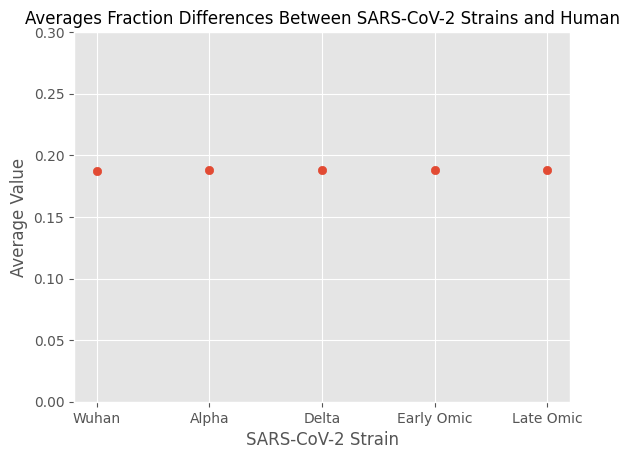

In [ ]:
'''

'''


# Wuhan
wuhan_frac_col = finalTable0.loc[:, "Frac Diffs"]
wuhan_avg_diff = np.mean(wuhan_frac_col.values)
# print(wuhan_avg_diff)

# Alpha
alpha_frac_col = finalTable.loc[:, "Frac Diffs"].values
alpha_avg_diff = np.mean(alpha_frac_col)

# Delta
delta_frac_col = finalTable1.loc[:, "Frac Diffs"].values
delta_avg_diff = np.mean(delta_frac_col)
# display(delta_frac_col)
# Index column names
# names = finalTable0
# display(names)

'''
Uncomment once have all start and end positions for omic1 and omic2
'''
# Early Omicron
omic1_frac_col = finalTable2.loc[:, "Frac Diffs"].values
omic1_avg_diff = np.mean(omic1_frac_col)

# Later Omicron
omic2_frac_col = finalTable3.loc[:, "Frac Diffs"].values
omic2_avg_diff = np.mean(omic2_frac_col)


total_Frac_Table = pd.DataFrame(wuhan_frac_col)


total_Frac_Table.columns =['Wuhan/Human Diffs']

total_Frac_Table['Alpha/Human Diffs'] = alpha_frac_col
total_Frac_Table['Delta/Human Diffs'] = delta_frac_col
'''
Run after getting start and ends of omics
'''
total_Frac_Table['Early Omic/Human Diffs'] = omic1_frac_col
total_Frac_Table['Late Omic/Human Diffs'] = omic2_frac_col


# Comment out once starts and ends of omics are entered
# total_Frac_Table.loc["Average of Diffs"] = [wuhan_avg_diff, alpha_avg_diff, delta_avg_diff, omic1_avg_diff,
#                                            omic2_avg_diff]


'''
Run after getting start and ends of omics
'''
total_Frac_Table.loc["Average of Diffs"] = [wuhan_avg_diff, alpha_avg_diff, delta_avg_diff,
                                           omic1_avg_diff, omic2_avg_diff]


# Ignore
# total_Frac_Table.columns =['Wuhan/Human Diffs', 'Alpha/Human Diffs', 'Delta/Human Diffs',
#                            'Early Omic/Human Diffs', 'Late Omic/Human Diffs']

display(total_Frac_Table)

# import dataframe_image as dfi
# dfi.export(total_Frac_Table,"Total_Fraction_Table.png")


import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots()
avgs = total_Frac_Table.loc["Average of Diffs", :].values
x = ["Wuhan", "Alpha", "Delta", "Early Omic", "Late Omic"]
ax.scatter(x, avgs)
plt.ylim(0, 0.3)
ax.set_title("Averages Fraction Differences Between SARS-CoV-2 Strains and Human", fontsize=12)
# ax.set_xlabel("SARS-CoV-2", fontsize=16)
# ax.set_ylabel("Average Value", fontsize=16)
ax.set(xlabel = "SARS-CoV-2 Strain", ylabel="Average Value")
plt.savefig("Average_Diffs_Graph.png", format="png")
plt.show()
# print(avgs)
